In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

#1: Load the dataset into the Python environment Replace 'titanic.csv' with the actual path to your file
titanic_data = pd.read_csv('/content/titanic_dataset.csv')




In [19]:
titanic_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,Unknown,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,65.6344,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,Unknown,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0.0,0,211536,13.0000,Unknown,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0.0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1.0,2,W./C. 6607,23.4500,Unknown,S


In [6]:
#2: Make 'PassengerId' as the index column
titanic_data.set_index('PassengerId', inplace=True)



In [13]:
#3: Check the basic details of the dataset
titanic_data.info()

titanic_data.describe(include='all')



<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    float64
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 83.5+ KB


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891,891
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,148,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,Unknown,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,687,646
mean,0.383838,2.308642,NaN,NaN,29.039282,0.426487,0.381594,NaN,24.046813,NaN,NaN
std,0.486592,0.836071,NaN,NaN,12.072074,0.708246,0.806057,NaN,20.481625,NaN,NaN
min,0.000000,1.000000,NaN,NaN,2.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


<ipython-input-18-b03f2f2a1080>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
<ipython-input-18-b03f2f2a1080>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

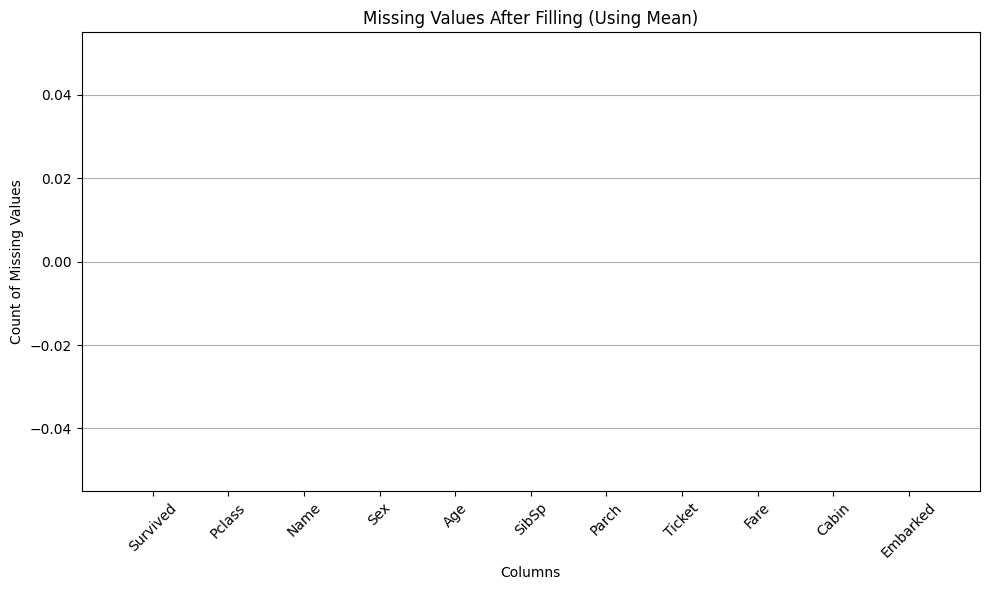

In [18]:
# Check missing values before handling
missing_values_before = titanic_data.isnull().sum()

# Fill in missing values using mean
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

# For 'Cabin', fill with 'Unknown'
titanic_data['Cabin'].fillna('Unknown', inplace=True)

# For 'Embarked', fill with mode
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Check missing values after handling
missing_values_after = titanic_data.isnull().sum()

# Create a DataFrame to compare before and after
missing_values_df = pd.DataFrame({
    'Before': missing_values_before,
    'After': missing_values_after
})

# Visualize missing values after filling using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(missing_values_after.index, missing_values_after.values, color='skyblue')
plt.title('Missing Values After Filling (Using Mean)')
plt.ylabel('Count of Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



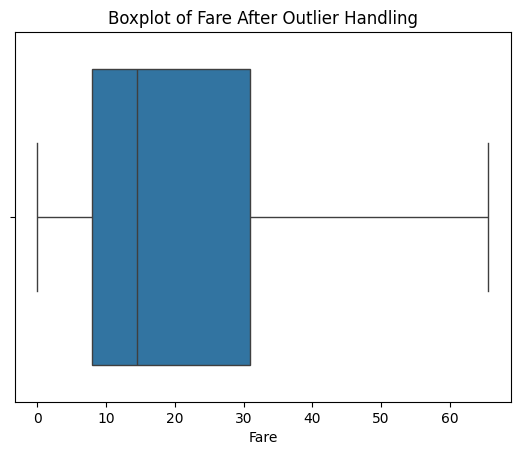

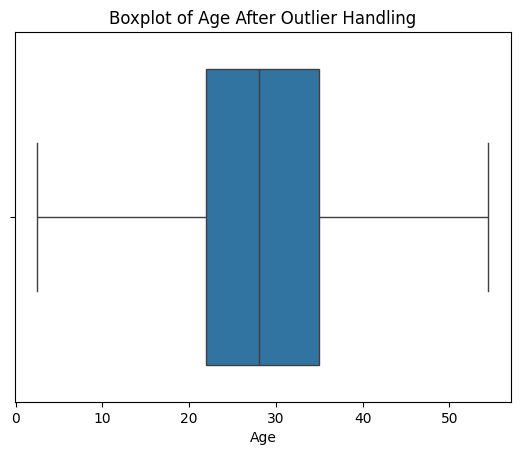

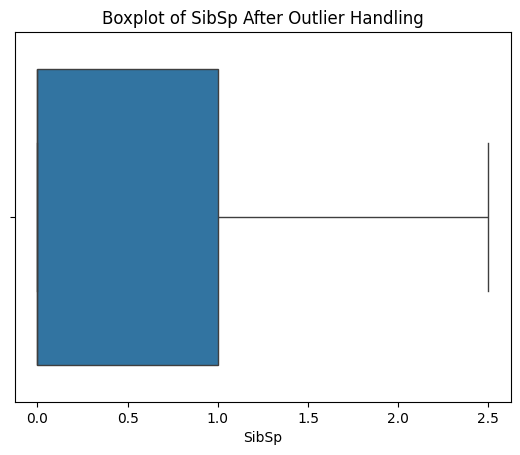

In [10]:
#5: Check and handle outliers in at least 3 columns
# Define a function to identify and handle outliers using IQR
def handle_outliers(column):
    Q1 = titanic_data[column].quantile(0.25)
    Q3 = titanic_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap the outliers
    titanic_data[column] = np.where(titanic_data[column] < lower_bound, lower_bound,
                                    np.where(titanic_data[column] > upper_bound, upper_bound, titanic_data[column]))

# Handle outliers for 'Fare', 'Age', and 'SibSp'
for col in ['Fare', 'Age', 'SibSp']:
    handle_outliers(col)

# Visualize the columns after handling outliers
for col in ['Fare', 'Age', 'SibSp']:
    sns.boxplot(x=titanic_data[col])
    plt.title(f"Boxplot of {col} After Outlier Handling")
    plt.show()



In [11]:
# 6: Do Min-Max Scaling on the feature set (Take 'Survived' as target)
scaler = MinMaxScaler()

# Define features (X) and target (y)
X = titanic_data.drop(columns=['Survived'])
y = titanic_data['Survived']

# Apply Min-Max Scaling on numeric features
X_scaled = pd.DataFrame(scaler.fit_transform(X.select_dtypes(include=[np.number])),
                        columns=X.select_dtypes(include=[np.number]).columns,
                        index=X.index)

# Combine scaled numeric features with non-numeric features
X_preprocessed = pd.concat([X_scaled, X.select_dtypes(exclude=[np.number])], axis=1)

print("\nFirst 5 Rows of Preprocessed Features:")
print(X_preprocessed.head())

# The target (y) remains unchanged
print("\nTarget (Survived) Distribution:")
print(y.value_counts())


First 5 Rows of Preprocessed Features:
             Pclass       Age  SibSp  Parch      Fare  \
PassengerId                                             
1               1.0  0.375000    0.4    0.0  0.110460   
2               0.0  0.682692    0.4    0.0  1.000000   
3               1.0  0.451923    0.0    0.0  0.120745   
4               0.0  0.625000    0.4    0.0  0.809027   
5               1.0  0.625000    0.0    0.0  0.122649   

                                                          Name     Sex  \
PassengerId                                                              
1                                      Braund, Mr. Owen Harris    male   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
3                                       Heikkinen, Miss. Laina  female   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
5                                     Allen, Mr. William Henry    male   

                       Ticket    Cabin Em